<img src="numpy.png" width="450">   

<br>

# The NumPy.random package
[Official Documentation](https://numpy.org/doc/stable/reference/random/index.html) [5]
***

<br>

## Assignment Objectives
- Explain the overall purpose of the numpy.random package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

<br>

### Overall purpose of the package
***

#### numpy (Version 1.21)
NumPy (Numerical Python) is a very popular open source library comprised of multidimensional array objects, mathematical functions, linear algebra<br>
routines, random number generators and more [1]. The library is very popular due to its high level syntax and ability to perform rapid data operations.<br>
One can explain the speed by looking deeper at how the package operates. Data structures known as ndarrays (N-dimensional arrays) only accept data of<br>
the same type and then map these data structured to highly optimised C compiled code [2]. As Soklaski 2020 describes, this process of vectorization is<br>
so effective when compared to iterating lists and tuples as the ndarrays dont have to check every elements data-type on iteration, resulting in a process<br>
that is orders of magniture faster.<br> 

NumPy's operational speed and diversity of mathematical functions make the package of great utility for tasks that involve numerical processing on large<br>
datasets, such as Machine Learning. The package also provides a very useful module for generating random numbers that will now be explored, a package<br>
named *numpy.random*.

<br>

#### numpy.random

This sub-module has the ability to produce pseudo-random sequences and model chosen statistical distribtions, which can be powerful when applied to data<br>
science or machine learning applications. Considering that certain real world phenomena follow predictable distibutions when the sample size is of sufficient<br> 
scale, one can generate a model and make predictons. An example of this would be modelling population as a *normal distribtuion* (bell-curve shape) and using<br> 
this model to make predictions on real-world data.

As per the offical documnetation the random sub-module functions can be categorized into the following: <br>
- *Simple random data* functions that can generate pseudo-random data arrays. 
- *Permutations* function that are used to randomly modify a sequence.
- *Distribution* functions that use randomly generated arrays to sample from a chosen statistical distribtuion.<br>

<br>

### Simple random data
***
As per the offical documentation, the approach of numPy V1.21 to generating random numbers consists of using a *BitGenerators* and a *random generator*.<br> 
The BitGenerators produces an array of random bits which which are passed to a generator, which can be used to model different probability distributions.<br>
One can call the *default_rng()* constructor to instansiate an object of the Generator Class and then apply *simple random data* functions that belong to the class.<br> Before exploring this further lets import the relevant libraries and define histogram functions for future use.

In [1]:
# import libraries
%matplotlib inline
import numpy as np                   
import matplotlib.pyplot as plt        

# Construct new Generator and store in rng variable
# Uses default BitGenerator (PCG64)
rng = np.random.default_rng()

In [2]:
def plot_hist(array, y_label, title, bin_num, bin_spacer):
    
    plt.hist(array, density = True, bins = bin_num, rwidth = bin_spacer)     
    plt.title(title)  
    #plt.xlabel('Data')  
    plt.ylabel(y_label)
    plt.tight_layout(pad = 2)
    plt.show()

In [ ]:
def plot_histogram(array, y_label, title, bin_num, bin_spacer):
    
    fig, axs = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (8, 4))
    plt.hist(array, density = True, bins = bin_num, rwidth = bin_spacer)     
    plt.title(title)  
    #plt.xlabel('Data')  
    plt.ylabel(y_label)
    plt.tight_layout(pad = 2)
    plt.show()

In [3]:
def plot_hist_twice(array_one, array_two, title_one, title_two, figure_number):
    
    fig, axs = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (8, 4))
    axs[0].hist(array_one, density = False, bins = 30)
    axs[1].hist(array_two, density = False, bins = 30)
    
    txt = "Figure" + str(figure_number) 
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment = 'center', fontsize = 15)   
        
    # loop over axes objects in the figure object.. why not
    for plot_index, ax in enumerate(fig.axes):          
        ax.set_xlabel('data range')   
        ax.set_facecolor('silver')
 
        if plot_index < 1:     
            ax.set_title(str(title_one))  
            ax.set_ylabel('count')
        else:     
            ax.set_title(str(title_two))  
     
    fig.tight_layout(pad = 2)
    plt.show()

<br>

#### Random Generator Functions

This version of NumPy recommends two random number generating functions that can be utilised when one accesses the Generator via<br>
*np.random.default_rng()*. Both functions produce random numbers from the uniform distribution. In other words, all outcomes are equally likely and can<br> produce a symmetric probability distribution when the sample size sufficient scale, see the two functions below.

- ***generator.integers()*** <br>
Produces random integers from a "discrete" uniform distribution. This means that any symmetric probability distriubtion has a finite number of<br>
values [7]. This makes sense as the function produces whole numbers. See *Figure 1* below and the code used to generate the histogram to see the uniformity<br> of the distribution and how it increases with a larger sample size.<br><br>
- ***generator.random()*** <br>
Produces random floating point numbers from a “continuous" uniform distribution, i.e : any symmetric probability distriubtion has an infinite number of<br> possible values [7]. This also makes sense as the function can produce an infinite range of numbers (floats).

                             data type check :int64


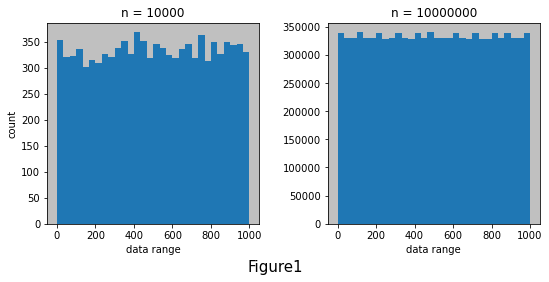

In [4]:
# generator.integers function
# syntax: Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

# Call integers function on generator and pass n values  
# of range 0 (inclusive) to 1001 (exclusive) and dtype int64    
small_array = rng.integers(1001, size = 10000)     
large_array = rng.integers(1001, size = 10000000)   

# check data type
print(' '*28, 'data type check :' + str(small_array.dtype))

# Pass variables to hist function
plot_hist_twice(small_array, large_array, 'n = 10000', 'n = 10000000', 1)

<br>

#### Choice Function

This functions generates or selects a random sample from a given array. 
doc comment... continue 
If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated from np.arange(a).

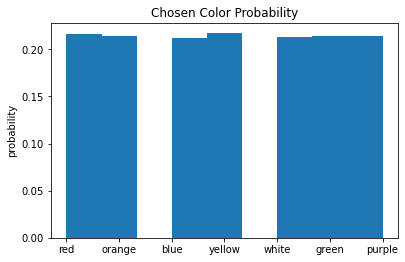

In [34]:
colors = ['blue', 'black', 'green', 'red', 'yellow', 'orange', 'purple', 'brown', 'white']
selections = []
selections_weighted = []
probabilities = []


# append choices from color list to selections list
for i in range(10000):
    selection = rng.choice(colors) 
    selections.append(selection)
    
 
    # make weighted proability list 
for color in colors:
    if color in ['black', 'brown']:
        probabilities.append(0)
    else:
        probabilities.append(1/7)
        
   

    # append weighted choices from color list to selections list
for i in range(100000):
    selection_weighted = rng.choice(colors, p = probabilities)        
    selections_weighted.append(selection_weighted)

plot_hist(selections_weighted, 'probability', 'Chosen Color Probability', 9, 20)


#### Generator.bytes  
[(Documentation)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) 
<br>

<br>

### Pemutation Functions

What do permutation functions do and why are they useful

In [31]:
# shuffle(x, axis = 0)
# random.Generator.shuffle(x, axis=0)
    # Modify an array or sequence in-place by shuffling its contents. Acts as if 1d
    # random.Generator.shuffle(x, axis=0)

array = np.arange(9).reshape((3, 3))
print('Template Array')
print(array)

array_shuffled = rng.shuffle(array)
print('Shuffled Array')
print(array)

array_permutation = rng.permutation(array, axis = 0)
print('Permutation Array')
print(array)

array_permuted = rng.permuted(array, axis = 1)
print('Permuted Array')
print(array)


Template Array
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Shuffled Array
[[3 4 5]
 [6 7 8]
 [0 1 2]]
Permutation Array
[[3 4 5]
 [6 7 8]
 [0 1 2]]
Permuted Array
[[3 4 5]
 [6 7 8]
 [0 1 2]]


### Probability Distributions

<br>
Generators: Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval.<br>

*Generator*  sample from the array and output different statistical distributions. <br>

<br>
Call default_rng to get a new instance of a Generator, then call its methods to obtain samples from different distributions. By default, Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState.

<br>
<br>
The Generator is the user-facing object that is nearly identical to the legacy RandomState. It accepts a bit generator instance as an argument. The default is currently PCG64 but this may change in future versions. As a convenience NumPy provides the default_rng function to hide these details:



A uniform distribution is one where all outcomes have equal probability. <br>
USE THIS REF
Menon 2021 describes how these distributions consist of a symmetric probability distriubtion and a finite number number of values[6]. <br>
 

#### Generator.uniform

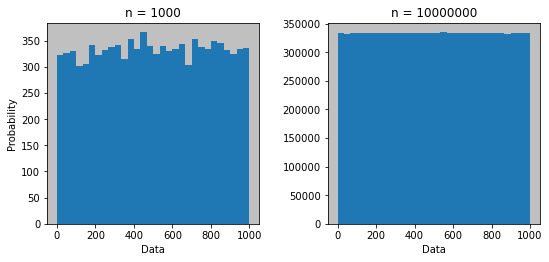

In [7]:
#### Uniform
# Uniform distriubtion function
s_small = np.random.default_rng().uniform(0, 1000, 10000)
s_large = np.random.default_rng().uniform(0, 1000, 10000000)
plot_hist_twice(s_small, s_large, 'n = 1000', 'n = 10000000')

#### Binomial

#### Hypergeometric 
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.hypergeometric.html) <br>
Explanation...<br>
Samples are drawn from a hypergeometric distribution with specified parameters, ngood (ways to make a good selection), nbad (ways to make a bad selection), and nsample (number of items sampled, which is less than or equal to the sum ngood + nbad).

for P(x) = probability of x good results in the drawn sample, <br>
g = ngood,  <br>
b = nbad, and  <br>
n = nsample <br>

(array([233.,   0., 394.,   0.,   0., 276.,   0.,  86.,   0.,  11.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

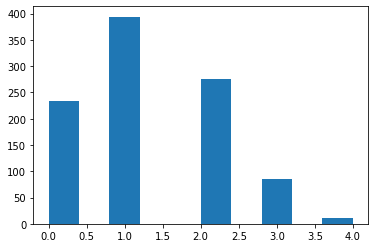

In [35]:
# random.hypergeometric(ngood, nbad, nsample, size=None)
# ngood = spades = 13
# nsample = sample size  = 5 
# nbad = sample size - ngood = 52 - 13 = 39

ngood, nbad, nsamp = 13, 39, 5
# number of good, number of bad, and number of samples
s = np.random.hypergeometric(ngood, nbad, nsamp, 1000)
from matplotlib.pyplot import hist
hist(s)


\begin{align}
Equation :  && P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}} && P(2)=\frac{\binom{13}{2}\binom{52-13}{5-2}}{\binom{52}{5}}
\end{align}

***Forumla***<br>
<h3>Equation: &nbsp;   &nbsp;  &nbsp;   &nbsp;  $P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}}$ &nbsp;   &nbsp;  &nbsp;   &nbsp;  $ P(2)=\frac{\binom{13}{2}\binom{52-13}{5-2}}{\binom{52}{5}}$<h3> 

### References

[1]. Tutorialspoint, 2021, NumPy Tutorial, Available at: https://www.tutorialspoint.com/numpy/index.htm (Accessed: 21 October 2021).<br>

<br> 

[2]. Soklaski, R, 2020, “Vectorized” Operations: Optimized Computations on NumPy Arrays, Available at:<br> https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html# (Accessed: 21 October 2021).<br>

<br> 

[3]. Mahto, P, 2020, NumPy For Machine Learning, Available at: https://medium.com/mlpoint/numpy-for-machine-learning-211a3e58b574<br>
(Accessed: 26 October 2021).<br>

<br>

[4]. Bertoldi, D, 2019, Building a Pseudorandom Number Generator, Available at: https://www.tutorialspoint.com/numpy/index.htm<br>
 (Accessed: 26 October 2021).<br>
 
<br>
 
[5]. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362. <br>

<br>
 
[6]  Sarkar, T, 2020, How to generate random variables from scratch, Available at:<br>
https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7 (Accessed: 27 October 2021). <br>

test
<br>

[7]. Menon, V, 2021, Understanding Probability Distribution, Available at: https://medium.com/swlh/understanding-probability-distribution-b5c041f5d564<br>
(Accessed: 02 November 2021).


<br>
<br>
<br>
<br>



<br>
<br>

extra:<br>
probability distributions: <br>
Bit generator:<br>
https://bashtage.github.io/randomgen/custom-bit-generators.html<br>
https://towardsdatascience.com/before-probability-distributions-d8a2f36b1cb<br>

later 




<br>

#### discuss this part later (mabye compare old to new?)
The new infrastructure takes a different approach to producing random numbers from the RandomState object. 
Random number generation is separated into two components, a bit generator and a random generator.



The BitGenerator has a limited set of responsibilities. It manages state and provides functions to produce random doubles and random unsigned 32- and 64-bit values.

BitGenerators: Objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits.


Simply speaking, a generator is a function that returns an object (iterator) which we can iterate over (one value at a time).


<br>
*class numpy.random.Generator(bit_generator)*


In [ ]:
\begin{align}
Equation :  && P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}} && P(2)=\frac{\binom{13}{2}\binom{52-13}{5-2}}{\binom{52}{5}}
\end{align}